# Splitting Data

In [157]:
import os
import pydot
import pandas as pd
import numpy as np
import math
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import graphviz
from __future__ import division, print_function, unicode_literals
%matplotlib inline
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [67]:
bankdata = pd.read_csv('/Users/hanxiao/Downloads/bank_data.csv')
bankdata.head()

,Unnamed: 0,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver,High_Risk,Attrition_Flag
0,0,-0.165406,-1.059956,0.503368,-0.354022,0.620039,0.384621,0.763943,-1.327136,0.492404,...,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794,-0.460373,0
1,1,0.333570,0.943436,2.043199,0.822218,-0.736292,1.010715,1.407306,-1.327136,-0.411616,...,-0.282405,-0.928214,1.252337,-0.282609,0.270611,-0.107644,-0.044484,-0.240794,-0.460373,0
2,2,0.583058,-1.059956,0.503368,0.822218,1.298204,0.008965,0.120579,-1.327136,-2.219655,...,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794,-0.460373,0
3,3,-0.789126,0.943436,1.273283,-0.354022,-0.736292,-0.241473,-0.522785,1.641478,-1.315636,...,-0.282405,-0.928214,-0.798507,3.538459,0.270611,-0.107644,-0.044484,-0.240794,-0.460373,0
4,4,-0.789126,-1.059956,0.503368,-0.942142,0.620039,-1.869317,0.763943,-1.327136,-2.219655,...,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794,-0.460373,0


In [60]:
# Retrieving Attributes
X = bankdata.iloc[:, 1:27] # keep specific attributes 

# Retriving Target Variable
y = bankdata.loc[:, 'Attrition_Flag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42,
                                                    stratify = y)
print('The size of training set is ',X_train.shape,y_train.shape)  
print('The size of testing set is ',X_test.shape,y_test.shape) 

The size of training set is  (7500, 26) (7500,)
The size of testing set is  (2500, 26) (2500,)


In [61]:
np.random.seed(42) # tuning parameters
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True) # cross validation

# Logistic Regression Model

In [201]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report

def evaluate_model(predictions, train_predictions, train_labels, test_labels):

    # the predictive accuracy, precision, recall, and f1_score. 
    
    results = {}
    results['accuracy'] = accuracy_score(test_labels.astype(int), predictions)
    results['recall'] = recall_score(test_labels.astype(int), predictions)
    results['precision'] = precision_score(test_labels.astype(int), predictions)
    results['f1'] = f1_score(test_labels.astype(int), predictions)
    print('Accuracy (out of sample):',results['accuracy'])
    print('Recall (out of sample):',results['recall'])
    print('Precision (out of sample):',results['precision'])
    print('f1_score (out of sample):',results['f1'])
    
    print('\n')
    
    # the accuracy, precision, recall and f1_score of training set
    
    results = {}
    results['accuracy'] = accuracy_score(train_labels.astype(int), train_predictions)
    results['recall'] = recall_score(train_labels.astype(int), train_predictions)
    results['precision'] = precision_score(train_labels.astype(int), train_predictions)
    results['f1'] = f1_score(train_labels.astype(int), train_predictions)
    print('Accuracy (in sample):',results['accuracy'])
    print('Recall (in sample):',results['recall'])
    print('Precision (in sample):',results['precision'])
    print('f1_score (in sample):',results['f1'])
    
    cm = confusion_matrix(test_labels.astype('int'), predictions)
    print('\n')
    print('Confusion Matrix:\n',cm)    
    
    print('\n\nClassification Metrix:\n', classification_report(y_test, y_test_pred, target_names = ["No Attrition", "Attrition"]))

## Hyperparameter: Grid Search

In [65]:
gs_LR = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring='f1_weighted',
                  cv=inner_cv)

gs_LR = gs_LR.fit(X,y)
print("\n Parameter Tuning Logistic Regression")
print("Non-nested CV f1: ", gs_LR.best_score_)
print("Optimal Parameter: ", gs_LR.best_params_)
print("Optimal Estimator: ", gs_LR.best_estimator_)
nested_score_gs = cross_val_score(gs_LR, X=X, y=y, cv=outer_cv)
print("Nested CV f1:",nested_score_gs.mean(), " +/- ", nested_score_gs.std())


 Parameter Tuning Logistic Regression
Non-nested CV f1:  0.857908216563055
Optimal Parameter:  {'C': 0.1, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')
Nested CV f1: 0.8585907272545956  +/-  0.00352905037843219


## Intercept and Coefficients

In [70]:
clf1 = LogisticRegression(penalty='l1', 
                          C=0.1,
                          random_state=42,
                          solver='liblinear')
clf1.fit(X_train, y_train)
LR_intercept = clf1.intercept_
LR_coefficients = clf1.coef_[0]
print("The intercept of logictic regression model is: ", LR_intercept)
print("\nThe coefficients of logictic regression model is: ", LR_coefficients)

The intercept of logictic regression model is:  [-1.32675681]

The coefficients of logictic regression model is:  [-0.07951504  0.25490342  0.06889247 -0.00620546  0.0810358   0.
 -0.4142332   0.43393178  0.55266676  0.16068499 -0.47497319 -0.36654304
 -0.22138843  2.18888999 -3.49089695 -0.61992013 -0.3923973   0.
 -0.18116145  0.0109624   0.         -0.0054469   0.02480959  0.
  0.          0.21953888]


## Confusion Matrix

In [198]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
evaluate_model(y_test_pred, y_train_pred, y_train, y_test)

Accuracy (out of sample): 0.8676
Recall (out of sample): 0.87390263367917
Precision (out of sample): 0.863564668769716
f1_score (out of sample): 0.868702895676319


Accuracy (in sample): 0.8581333333333333
Recall (in sample): 0.8585106382978723
Precision (in sample): 0.8585106382978723
f1_score (in sample): 0.8585106382978723


Confusion Matrix:
 [[1074  173]
 [ 158 1095]]


Classification Metrix:
               precision    recall  f1-score   support

No Attrition       0.87      0.86      0.87      1247
   Attrition       0.86      0.87      0.87      1253

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500



## Important Features: Top 10

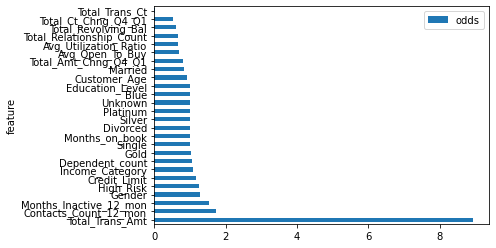

In [122]:
# match odds to column name
feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["odds"] = pow(math.e, LR_coefficients)  # e raised to the power x
feature_importance = feature_importance.sort_values(by = ["odds"], ascending=False)
# draw feature importance graph
ax = feature_importance.plot.barh(x='feature', y='odds')

,feature,odds
13,Total_Trans_Amt,8.925300
8,Contacts_Count_12_mon,1.737881
7,Months_Inactive_12_mon,1.543314
1,Gender,1.290337
25,High_Risk,1.245502
9,Credit_Limit,1.174315
4,Income_Category,1.084410
2,Dependent_count,1.071321
22,Gold,1.025120
19,Single,1.011023


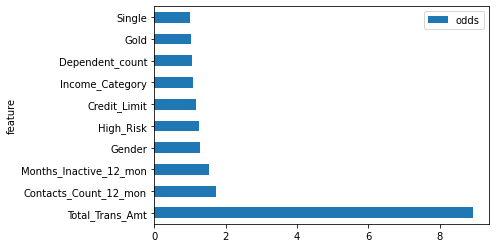

In [76]:
# draw a graph for top 10 features
ax2 = feature_importance.head(10).plot.barh(x='feature', y='odds')
feature_importance.head(10)

# kNN Model

## Hyperparameter: Grid Search

In [81]:
gs_kNN = GridSearchCV(estimator=KNeighborsClassifier(metric='minkowski'),
                      param_grid=[{
                          'n_neighbors': [3,5,7,9,11,13,15,17,19,21],
                          'weights': ['uniform', 'distance'],
                          'p': [1,2]
                      }],
                      scoring='f1_weighted',
                      cv=inner_cv,
                      n_jobs=4)

gs_kNN = gs_kNN.fit(X,y) 
print("\n Parameter Tuning kNN")
print("Non-nested CV f1: ", gs_kNN.best_score_)
print("Optimal Parameter: ", gs_kNN.best_params_)
print("Optimal Estimator: ", gs_kNN.best_estimator_)
nested_score_gs = cross_val_score(gs_kNN, X=X, y=y, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())


 Parameter Tuning kNN
Non-nested CV f1:  0.9344894112295543
Optimal Parameter:  {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')
Nested CV f1:  0.9318761292318118  +/-  0.0065716534847087334


In [89]:
clf2 = KNeighborsClassifier(n_neighbors=21,
                            p=1,
                            metric='minkowski',
                            weights='distance')
clf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')

## Confusion Matrix

In [199]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
evaluate_model(y_test_pred, y_train_pred, y_train, y_test)

Accuracy (out of sample): 0.9288
Recall (out of sample): 0.9896249002394254
Precision (out of sample): 0.8825622775800712
f1_score (out of sample): 0.9330323551542513


Accuracy (in sample): 1.0
Recall (in sample): 1.0
Precision (in sample): 1.0
f1_score (in sample): 1.0


Confusion Matrix:
 [[1082  165]
 [  13 1240]]


Classification Metrix:
               precision    recall  f1-score   support

No Attrition       0.99      0.87      0.92      1247
   Attrition       0.88      0.99      0.93      1253

    accuracy                           0.93      2500
   macro avg       0.94      0.93      0.93      2500
weighted avg       0.94      0.93      0.93      2500



# Decision Tree Model

## Hyperparameter: Grid Search

In [83]:
gs_DT = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                     param_grid = [{'criterion' : ['gini', 'entropy'],
                                    'max_depth' : range(4,15,1),
                                    'min_samples_leaf' : [1,2,3,4,5,6,7,8],
                                    'min_samples_split' : [2,3,4,5,6,7,8,9]
                                   }],
                     scoring = 'f1_weighted', 
                     cv = inner_cv,
                     n_jobs = 4)

gs_DT = gs_DT.fit(X,y)
print("Non-nested CV f1: ", gs_DT.best_score_)
# Parameter setting that gave the best results on the hold out data.
print("Optimal Parameter: ", gs_DT.best_params_)    
# Estimator that was chosen by the search, i.e. estimator which gave highest score
print("Optimal Estimator: ", gs_DT.best_estimator_) 
nested_score_gs = cross_val_score(gs_DT, X = X, y = y, cv = outer_cv)
print("Nested CV f1: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

Non-nested CV f1:  0.9686890582171787
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)
Nested CV f1:  0.9670909950379961  +/-  0.003851624336568264


In [126]:
clf3 = DecisionTreeClassifier(criterion = 'entropy', 
                              max_depth = 12, 
                              min_samples_leaf = 1,
                              min_samples_split = 2,
                              random_state=42
                             )
clf3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

## Confusion Matrix

In [200]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
evaluate_model(y_test_pred, y_train_pred, y_train, y_test)

Accuracy (out of sample): 0.9648
Recall (out of sample): 0.9744612928970471
Precision (out of sample): 0.9561472200469852
f1_score (out of sample): 0.9652173913043478


Accuracy (in sample): 0.9982666666666666
Recall (in sample): 0.9989361702127659
Precision (in sample): 0.9976095617529881
f1_score (in sample): 0.9982724252491695


Confusion Matrix:
 [[1191   56]
 [  32 1221]]


Classification Metrix:
               precision    recall  f1-score   support

No Attrition       0.97      0.96      0.96      1247
   Attrition       0.96      0.97      0.97      1253

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



## Important Features: Top 10

In [90]:
importance = clf3.feature_importances_

important_features_dict = dict()
for i,v in enumerate(importance):
    important_features_dict[i] = v

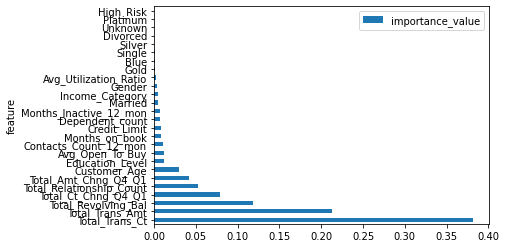

In [189]:
# match importance to column name
feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance_value"] = clf3.feature_importances_  # e raised to the power x
feature_importance = feature_importance.sort_values(by = ["importance_value"], ascending=False)
# draw feature importance graph
ax = feature_importance.plot.barh(x='feature', y='importance_value')

,feature,importance_value
14,Total_Trans_Ct,0.381492
13,Total_Trans_Amt,0.213455
10,Total_Revolving_Bal,0.118183
15,Total_Ct_Chng_Q4_Q1,0.079276
6,Total_Relationship_Count,0.052104
12,Total_Amt_Chng_Q4_Q1,0.041971
0,Customer_Age,0.029928
3,Education_Level,0.012114
11,Avg_Open_To_Buy,0.011581
8,Contacts_Count_12_mon,0.010270


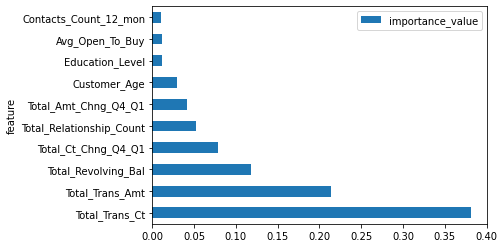

In [190]:
# draw a graph for top 10 features
ax2 = feature_importance.head(10).plot.barh(x='feature', y='importance_value')
feature_importance.head(10)

# Evaluation

In [100]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

## Learning Curve

In [85]:
### Function for Learning Curves 
def plot_learning_curve(estimator, title, X, y, scoring_method, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel(scoring_method)             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring = scoring_method, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,random_state =42)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

### Logistic Regression

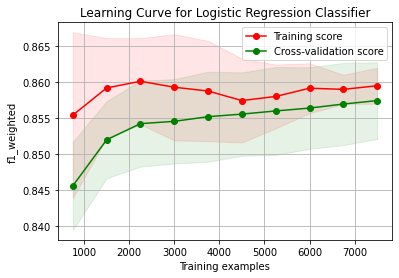

In [104]:
plot_learning_curve(clf1, 
                    "Learning Curve for Logistic Regression Classifier", 
                    X, y, 
                    'f1_weighted',
                    (0.60, 1.01), 
                    cv=cv, 
                    n_jobs=4)
plt.show()

### kNN

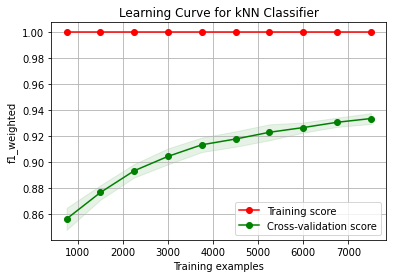

In [118]:
plot_learning_curve(clf2, 
                    "Learning Curve for kNN Classifier", 
                    X, y, 
                    'f1_weighted',
                    (0.60, 1.01), 
                    cv=cv, 
                    n_jobs=4)
plt.show()

### Decision Tree

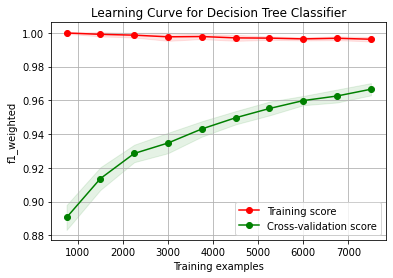

In [107]:
plot_learning_curve(clf3, 
                    "Learning Curve for Decision Tree Classifier", 
                    X, y, 
                    'f1_weighted',
                    (0.60, 1.01), 
                    cv=cv, 
                    n_jobs=4)
plt.show()

## Fitting Graph

In [108]:
# Function for fitting graphs
def plot_fitting_curve(estimator, title, X, y,param_name,param_range,scoring_method, ylim=None, cv=None,
                        n_jobs=1):
   
    plt.figure() 
    plt.grid()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Parameter "+param_name) 
    plt.ylabel(scoring_method)
    
    train_scores, test_scores = validation_curve(estimator=estimator, X=X,y=y,param_name=param_name, param_range=param_range,cv=cv,scoring=scoring_method,n_jobs=4)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training f1-score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(param_range, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation f1-score')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.legend(loc='best')
    plt.tight_layout()
    return plt

### Logistic Regression

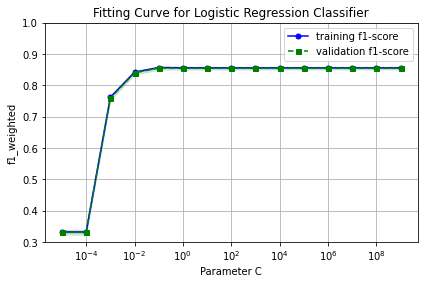

In [111]:
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
plot_fitting_curve(clf1, "Fitting Curve for Logistic Regression Classifier", X_train, y_train,
                   'C', param_range,'f1_weighted', ylim=[0.3,1], cv=cv, n_jobs=4)
plt.xscale('log')
plt.show()

### kNN

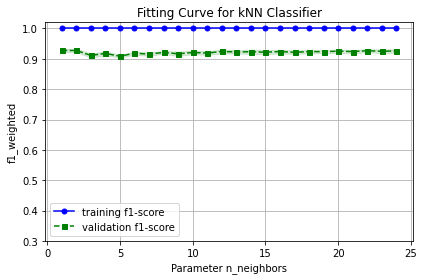

In [120]:
param_range = [i for i in range(1,25)]
plot_fitting_curve(clf2, "Fitting Curve for kNN Classifier", X_train, y_train,
                   'n_neighbors', param_range,'f1_weighted', ylim=[0.3,1.02], cv=cv, n_jobs=4)
plt.show()

### Decision Tree

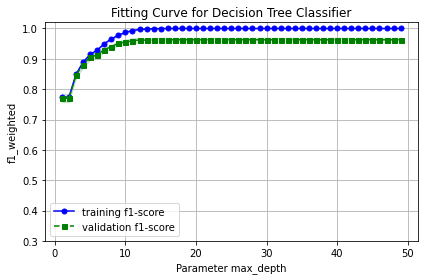

In [121]:
param_range = [i for i in range(1,50)]
plot_fitting_curve(clf3, "Fitting Curve for Decision Tree Classifier", X_train, y_train,
                   'max_depth',param_range,'f1_weighted', ylim=[0.3,1.02], cv=cv, n_jobs=4)
plt.show()

## ROC

In [115]:
def plot_ROC_curve(clf, label, clr, ls, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    
    return plt

### ROC AUC

In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


scores = cross_val_score(estimator = clf1,  #Estimate AUC based on cross validation
                         X = X,
                         y = y,
                         cv = cv,
                         scoring='roc_auc',
                         n_jobs = 4)

print("Logictic regression model: ROC AUC: %0.2f (+/- %0.2f)" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std()))

scores = cross_val_score(estimator = clf2,  #Estimate AUC based on cross validation
                         X = X,
                         y = y,
                         cv = cv,
                         scoring='roc_auc',
                         n_jobs = 4)

print("kNN model: ROC AUC: %0.2f (+/- %0.2f)" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std()))

scores = cross_val_score(estimator = clf3,  #Estimate AUC based on cross validation
                         X = X,
                         y = y,
                         cv = cv,
                         scoring='roc_auc',
                         n_jobs = 4)

print("Decision Tree model: ROC AUC: %0.2f (+/- %0.2f)" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std()))

Logictic regression model: ROC AUC: 0.93 (+/- 0.00)
kNN model: ROC AUC: 0.99 (+/- 0.00)
Decision Tree model: ROC AUC: 0.97 (+/- 0.00)


### ROC Curve

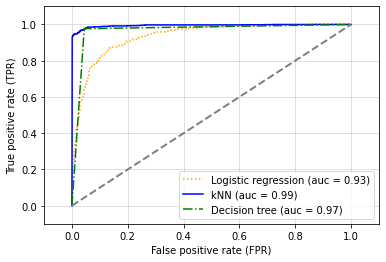

In [163]:
#LR
plot_ROC_curve(clf1, label='Logistic regression', clr='orange', ls=':', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#DT
plot_ROC_curve(clf2, label='kNN', clr='blue', ls='-', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#kNN
plot_ROC_curve(clf3, label='Decision tree', clr='green', ls='-.', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()